In [1]:
import os
import math
import imblearn
import logging
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score , accuracy_score , precision_score, recall_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from imblearn.combine import SMOTEENN
%matplotlib inline




from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv('Epileptic Seizure Recognition.csv')
df.head()


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


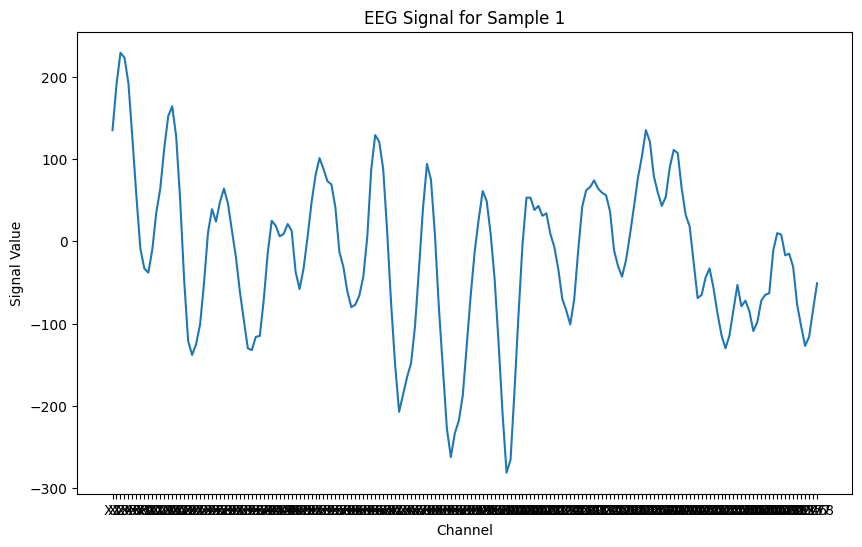

In [5]:

plt.figure(figsize=(10, 6))
plt.plot(df.iloc[0, 1:-1])  
plt.title('EEG Signal for Sample 1')
plt.xlabel('Channel')
plt.ylabel('Signal Value')
plt.show()


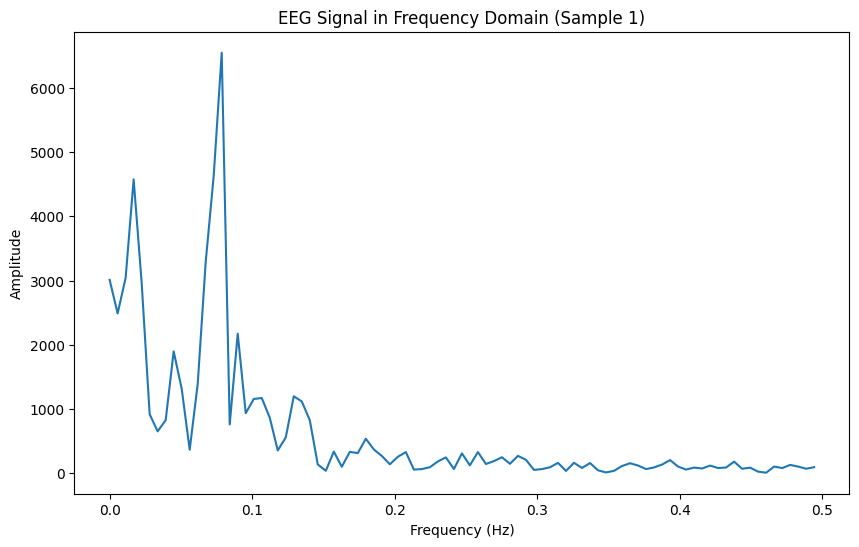

In [6]:
import numpy as np

# Perform FFT on the first sample
sample_signal = df.iloc[0, 1:-1]
fft_values = np.fft.fft(sample_signal)
frequencies = np.fft.fftfreq(len(sample_signal))

# Plot the FFT result (frequency domain)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(frequencies)//2])
plt.title('EEG Signal in Frequency Domain (Sample 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


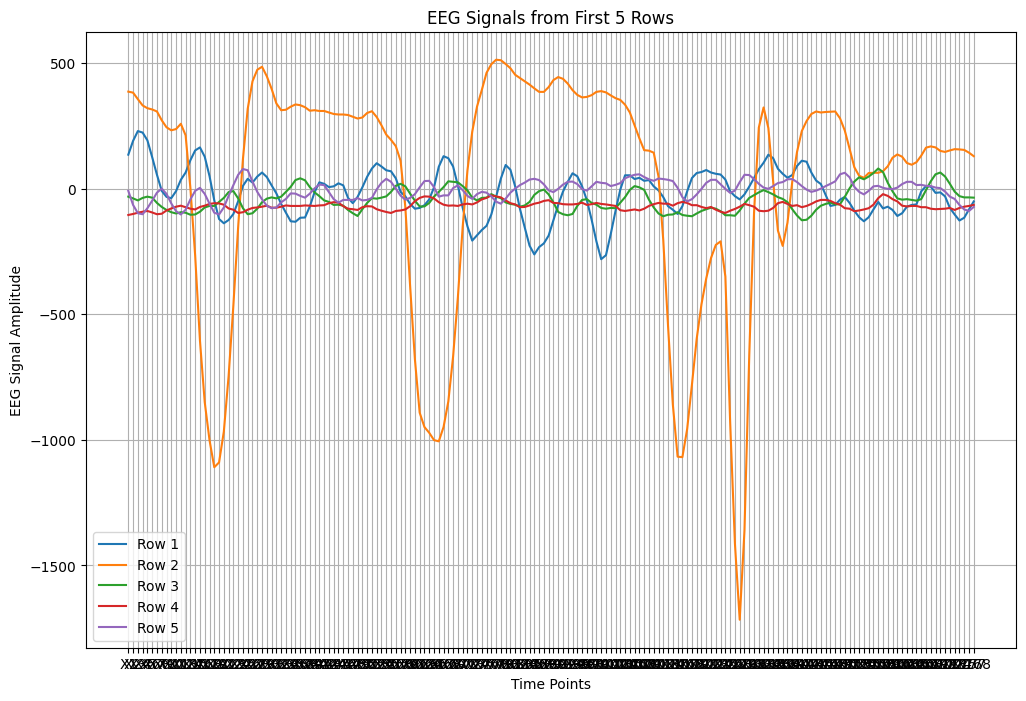

In [7]:
plt.figure(figsize=(12, 8))

for i in range(5):
    eeg_signal = df.iloc[i, 1:-1].astype(float)
    plt.plot(eeg_signal, label=f'Row {i + 1}')

plt.xlabel('Time Points')
plt.ylabel('EEG Signal Amplitude')
plt.title('EEG Signals from First 5 Rows')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df['y']=df['y'].replace([2,3,4,5],0)


In [9]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [10]:
df.y.value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

In [11]:
df=df.drop(['Unnamed'], axis=1)

In [12]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [13]:
X  = df.drop(['y'], axis=1)
y = df['y']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [15]:
X_val

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
1313,-14,-22,-20,-16,-2,0,-3,-9,-3,-4,...,4,11,3,-4,-9,-12,-17,-9,7,25
3132,-129,-120,-132,-147,-161,-132,-101,-81,-94,-91,...,-92,-103,-106,-106,-107,-105,-112,-124,-127,-125
2932,-7,-4,-2,-7,-13,-24,-29,-14,-6,-2,...,21,14,4,11,19,15,10,-1,-1,3
8613,-96,-76,-65,-45,-38,-42,-38,-38,-47,-42,...,-22,-27,-32,-35,-43,-46,-48,-46,-37,-34
3382,-493,-312,-285,-430,-621,-864,-885,-720,-406,-135,...,379,132,-76,-168,-183,-142,-234,-220,-80,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184,11,2,-4,-7,-12,-21,-24,-25,-24,-23,...,-13,-15,-6,-11,-16,-7,-7,-5,-10,-7
5900,344,267,153,17,-96,-223,-386,-561,-689,-631,...,-532,-406,-277,-142,-15,151,246,331,303,227
11279,-133,-127,-133,-134,-123,-113,-91,-82,-79,-92,...,-13,-38,-50,-74,-96,-109,-128,-120,-122,-102
5844,128,-154,-380,-525,-561,-502,-384,-259,-208,-233,...,946,864,725,569,415,266,90,-80,-187,-239


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#now we will going to scale the dataset
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
X_train = X_train.reshape((6900, 1, 178))
X_val = X_val.reshape((2300, 1,178))
X_test = X_test.reshape((2300, 1, 178))

Start Building our model

In [18]:
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,LSTM,Dense,Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import callbacks

2024-10-20 12:14:57.609930: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 12:14:57.623735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 12:14:57.637660: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 12:14:57.642185: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 12:14:57.654265: I tensorflow/core/platform/cpu_feature_guar

In [19]:
X_train.shape

(6900, 1, 178)

In [20]:
from tensorflow.keras.layers import GRU, Dense, Dropout
model = Sequential()


model.add(GRU(64, activation='tanh', input_shape=(1, 178), return_sequences=True))
model.add(Dropout(0.2))

# Second GRU layer: return_sequences=True (if stacking more GRUs)
model.add(GRU(32, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))

# Output layer: Binary classification
model.add(Dense(1, activation='sigmoid'))


model.summary()

I0000 00:00:1729406699.624440    7999 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729406699.673648    7999 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729406699.676216    7999 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729406699.681232    7999 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 64)          │        46,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,289 (219.88 KB)

 Trainable params: 56,289 (219.88 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/40


2024-10-20 12:15:02.105228: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7876 - loss: 0.5198 - val_accuracy: 0.7797 - val_loss: 0.5301
Epoch 2/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8094 - loss: 0.4932 - val_accuracy: 0.7797 - val_loss: 0.5291
Epoch 3/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8203 - loss: 0.4733 - val_accuracy: 0.7797 - val_loss: 0.5291
Epoch 4/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8179 - loss: 0.4769 - val_accuracy: 0.7797 - val_loss: 0.5280
Epoch 5/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8130 - loss: 0.4852 - val_accuracy: 0.7797 - val_loss: 0.5317
Epoch 6/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8047 - loss: 0.4955 - val_accuracy: 0.7797 - val_loss: 0.5337
Epoch 7/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8099 - loss: 0.4868 - val_accuracy: 0.7797 - val_loss: 0.5281
Epoch 8/40
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8033 - loss: 0.4988 - val_accuracy: 0.7797 - val_

#### model.layers[0].get_weights()

In [23]:
y_log=model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
y_log

array([[0.05296335],
       [0.053689  ],
       [0.9158993 ],
       ...,
       [0.05623385],
       [0.99933535],
       [0.07945457]], dtype=float32)

In [25]:
y_pred=np.where(y_log>0.5,1,0)

In [26]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [27]:
accuracy_score(y_test,y_pred)

0.9239130434782609

In [28]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='binary')
f1

0.7957992998833139

In [29]:
a=history.history

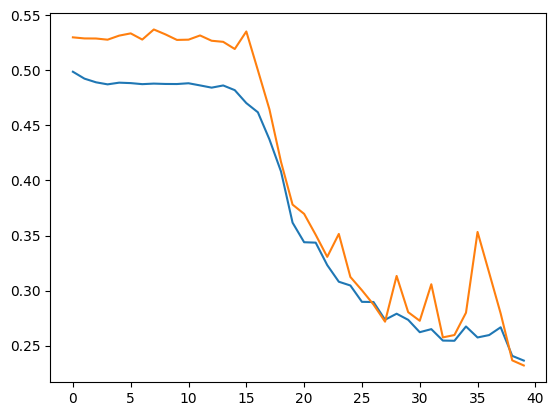

In [30]:
import matplotlib.pyplot as mlt
mlt.plot(history.history['loss'])
mlt.plot(history.history['val_loss'])

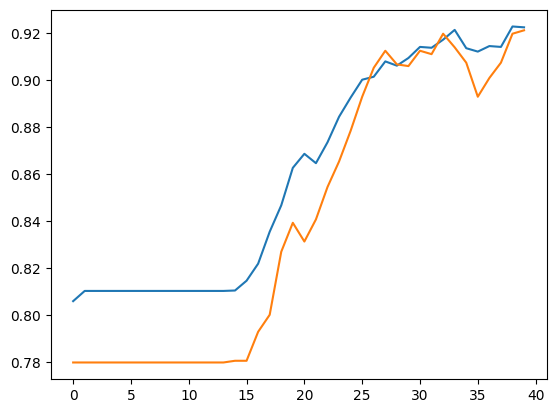

In [31]:
mlt.plot(history.history['accuracy'])
mlt.plot(history.history['val_accuracy'])

In [32]:
import pickle
with open("ann_model.pkl", "wb") as file:
    pickle.dump(model, file)